In [1]:
from __future__ import division

import numpy as np
from catboost import CatBoostClassifier, Pool
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import StratifiedKFold

from tqdm import tqdm

import gc

import copy
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
age_test = pd.read_csv("../data/age_test.csv", header = None)
age_train = pd.read_csv("../data/age_train.csv", header = None, names=['uId','age'])

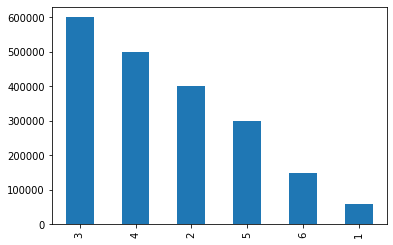

In [3]:
age_train['age'].value_counts().plot.bar()

In [4]:
user_basic_info_data = pd.read_csv( r'../data/user_basic_info.csv',header=None,names=['uId','gender','city','prodName','ramCapacity','ramLeftRation',
                                                                                    'romCapacity','romLeftRation','color','fontSize','ct','carrier','os'])


In [5]:
bisic_data = pd.merge(age_train,user_basic_info_data,how='inner',on='uId')

In [6]:
bisic_data

,uId,age,gender,city,prodName,ramCapacity,ramLeftRation,romCapacity,romLeftRation,color,fontSize,ct,carrier,os
0,1000001,4,0,c00145,p00169,3.0,0.43,32.0,0.46,皓月银,1.15000,4g,China_Mobile,8.0
1,1000011,3,0,c00126,p0023,NaN,NaN,NaN,NaN,幻夜黑,NaN,4g#wifi,China_Mobile,8.1
2,1000015,5,1,c00306,p00169,3.0,0.34,32.0,0.06,皓月银,1.30000,wifi,China_Telecom,8.0
3,1000019,3,0,c00150,p0049,2.0,NaN,17.0,NaN,蓝色,NaN,NaN,China_Unicom,8.1
4,1000023,2,1,c0037,p0047,2.0,0.34,16.0,0.06,银色,1.00000,wifi,China_Telecom,7.0
5,1000025,4,0,c006,p00171,4.0,0.31,64.0,0.20,琥珀金,1.00000,4g#wifi,China_Telecom,8.0
6,1000029,4,0,c0093,p00156,6.0,0.20,68.0,0.27,极光色,1.15000,4g#wifi,China_Unicom,9.0
7,1000035,2,0,c00316,p00156,6.0,0.26,68.0,0.64,宝石蓝,1.15000,wifi,China_Telecom,9.0
8,1000037,4,0,c00324,p00107,4.0,0.40,64.0,0.02,香槟金,NaN,wifi,China_Unicom,8.0
9,1000038,3,0,c0076,p0011,4.0,0.29,64.0,0.16,流光金,1.00000,4g#wifi,China_Mobile,7.0


In [ ]:
bisic_data.plot.bar(x='age', y='fontSize')

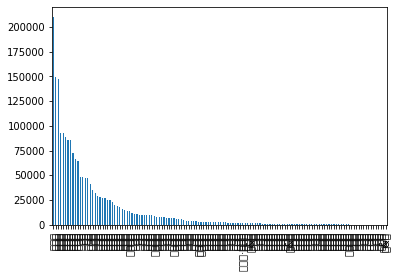

In [8]:
bisic_data['color'].value_counts().plot.bar()